In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from functions.Pre_processing_models import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from functions.Pre_processing_Casos_Graves import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection._search import GridSearchCV
from sklearn.model_selection._split import StratifiedKFold
from sklearn import svm

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectFdr

import optuna
from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.model_selection import RepeatedKFold

Lendo o dataset

In [2]:
df = pd.read_csv(r'C:\Users\mcacs\Desktop\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

Utilizando a class random forest para fazer o pré processamento

In [3]:
list_features = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
                'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS','SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE',
                'SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION','DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY','DISEASE_IMMUNOSUPPRESSION',
                'DISEASE_TABAGIST','DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino', 'data_notificacao']

In [4]:
Pre_processing_models = Pre_processing_models(df)
Pre_processing_models.run_graves()

df = Pre_processing_models.df
df = df[list_features]
df

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.460870,0,1,2020-05-30
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2020-06-02
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.747826,1,0,2020-06-02
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,0,1,2020-06-01
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.591304,0,1,2020-06-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.669565,0,1,2022-06-08
36431,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.643478,0,1,2022-06-09
36432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.643478,0,1,2022-06-10
36433,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.634783,1,0,2022-06-12


In [ ]:
"""df = df.sort_values(by='data_notificacao')
df = df.drop(labels="data_notificacao", axis=1)
df"""

In [5]:
df2 = pd.DataFrame()
df2 = df
df2.set_index('data_notificacao', inplace=True)
df2.sort_index(inplace=True)
df2

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2020-02-26,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.356522,0,1
2020-02-26,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.278261,0,1
2020-02-27,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.217391,1,0
2020-02-27,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0.278261,0,1
2020-02-27,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.260870,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-12,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2022-06-12,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.556522,0,1
2022-06-12,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.573913,1,0


In [34]:
# def XGBoost_objective (trial):

#     classifier_name = trial.suggest_categorical("classifier", ["XGBoost"])
    
#     max_depth = trial.suggest_float("max_depth", 3, 5, 7),
#     learning_rate = trial.suggest_float("learning_rate", 0.1, 0.2),
#     gamma = trial.suggest_float("gamma", 0.25, 1),
#     reg_lambda = trial.suggest_float("reg_lambda", 0, 1, 10),
#     scale_pos_weight = trial.suggest_float("scale_pos_weight", 1, 3, 5),
#     subsample = trial.suggest_float("subsample", 0.5, 0.8),
#     colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 0.9)

#     # Init classifier
#     xgb_cl = xgb.XGBClassifier( #max_depth = max_depth , 
#                                 learning_rate =learning_rate,
#                                 reg_lambda = reg_lambda,
#                                 gamma = gamma,
#                                 scale_pos_weight = scale_pos_weight,
#                                 subsample = subsample,
#                                 colsample_bytree = colsample_bytree, 
#                                 objective="binary:logistic")

#     # prepare the cross-validation procedure
#     cv = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = 1)

#     score = cross_val_score(xgb_cl, X_train, y_train, n_jobs=-1, cv=cv ,scoring='f1')
#     f1 = score.mean() 
#     return f1


# X = df.drop("death",axis=1)
# y = df['death']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# if __name__ == "__main__":
#     study = optuna.create_study(direction="maximize")
#     study.optimize(XGBoost_objective, n_trials = 50)
#     print(study.best_trial)

Criando um função para executar o modelo com k-fold e com repetição

In [6]:
def XGBoost_model (X_train, y_train):
    param_grid = {
        "max_depth": [3, 5, 7],
        #"learning_rate": [0.1, 0.2],
        "gamma": [0.25, 1],
        #"reg_lambda": [0, 1, 10],
        "scale_pos_weight": [1, 3, 5],
        #"subsample": [0.8],
        "colsample_bytree": [0.5, 0.9] }

    # Init classifier
    xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = 1)

    # Init Grid Search
    grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs = -1, cv=5, scoring = "roc_auc")

    # Fit 
    _ = grid_cv.fit(X_train, y_train)

    mean_test_score = grid_cv.cv_results_['mean_test_score'].mean()
    std_test_score = grid_cv.cv_results_['std_test_score'].mean()
    best_score = grid_cv.best_score_
    best_params = grid_cv.best_params_

    #print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score']}")
    #print(f"std_test_score: {grid_cv.cv_results_['std_test_score']}")
    #print('')

    print('#'*40)
    print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score'].mean()}")
    print(f"std_test_score: {grid_cv.cv_results_['std_test_score'].mean()}")
    print('')
    print(f'best_score: {grid_cv.best_score_}')
    print(f'best_params_: {grid_cv.best_params_}')
    print('#'*40)
    print('')

    return mean_test_score, std_test_score, best_score, best_params

#### Aplicação do modelo para o dataset completo:

In [7]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 2)

#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]
#list_random_states = [0, 12, 42]

#listas para armazenar os resutados
mean_test_scores = []
std_test_scores = []
best_scores = []
best_params = []

X = df2.drop(labels=['death'], axis=1)
y = df2['death']


for random_state in list_random_states:
    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores.append(mean_test_score)
    std_test_scores.append(std_test_score)
    best_scores.append(best_score)
    best_params.append(best_param)


########################################
mean_test_score: 0.8104554371426808
std_test_score: 0.06646873628645193

best_score: 0.8176346567149235
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.8104554371426808
std_test_score: 0.06646873628645193

best_score: 0.8176346567149235
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.8104554371426808
std_test_score: 0.06646873628645193

best_score: 0.8176346567149235
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.8104554371426808
std_test_score: 0.06646873628645193

best_score: 0.8176346567149235
best_params_: {'colsa

In [7]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
#list_random_states = [0,12,42,50,54,68,79,81,92,112]
list_random_states = [0, 12, 42]

#listas para armazenar os resutados
mean_test_scores = []
std_test_scores = []
best_scores = []
best_params = []

X = df.drop("death",axis=1)
y = df['death']


for random_state in list_random_states:
    """for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]"""

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=.33, random_state = random_state)


    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores.append(mean_test_score)
    std_test_scores.append(std_test_score)
    best_scores.append(best_score)
    best_params.append(best_param)

########################################
mean_test_score: 0.8101685325314362
std_test_score: 0.06601764604354683

best_score: 0.8177869525385664
best_params_: {'colsample_bytree': 0.5, 'gamma': 0.25, 'max_depth': 3, 'scale_pos_weight': 5}
########################################

########################################
mean_test_score: 0.8101685325314362
std_test_score: 0.06601764604354683

best_score: 0.8177869525385664
best_params_: {'colsample_bytree': 0.5, 'gamma': 0.25, 'max_depth': 3, 'scale_pos_weight': 5}
########################################

########################################
mean_test_score: 0.8101685325314362
std_test_score: 0.06601764604354683

best_score: 0.8177869525385664
best_params_: {'colsample_bytree': 0.5, 'gamma': 0.25, 'max_depth': 3, 'scale_pos_weight': 5}
########################################



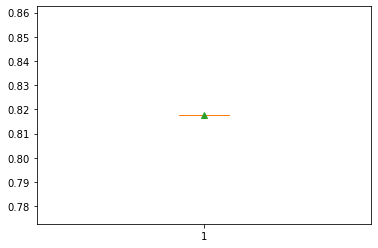

In [8]:
from matplotlib import pyplot

pyplot.boxplot(best_scores, showmeans=True)
pyplot.show()

## Testando o modelo para os melhores parâmetros:

In [9]:
print(f'Best_score = {max(best_scores)}')
index = best_scores.index(max(best_scores))
print(f'Best_params = {best_params[index]}')

Best_score = 0.8176346567149235
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


In [10]:
# parametrizando o modelo final
final_cl = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl.fit(X_train, y_train)


preds = final_cl.predict(X_test)

print(accuracy_score(y_test, preds))
print(precision_score(y_test, preds))
print(f1_score(y_test, preds))

0.707369287772746
0.47434119278779474
0.43497615262321143


In [11]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.43497615262321143
0.6187658540893834
0.7073692877727459
0.6994698868534095


In [12]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.47434119278779474
0.6271392822809506
0.707369287772746
0.6942345652177148


In [13]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.6140844656854751

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


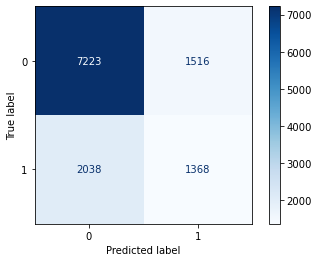

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      8739
           1       0.47      0.40      0.43      3406

    accuracy                           0.71     12145
   macro avg       0.63      0.61      0.62     12145
weighted avg       0.69      0.71      0.70     12145



In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

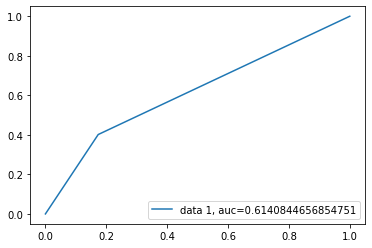

In [15]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Aplicando para os períodos de 6 meses:

In [16]:
df = pd.read_csv(r'C:\Users\mcacs\Desktop\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

In [17]:
periodo_1 = df[(df['data_notificacao'] > '2020-02-26') & (df['data_notificacao'] < '2020-08-31')]
periodo_2 = df[(df['data_notificacao'] > '2020-09-01') & (df['data_notificacao'] < '2021-02-28')]
periodo_3 = df[(df['data_notificacao'] > '2021-03-01') & (df['data_notificacao'] < '2021-08-31')]
periodo_4 = df[(df['data_notificacao'] > '2021-09-01') & (df['data_notificacao'] < '2022-02-28')]
periodo_5 = df[(df['data_notificacao'] > '2022-03-01') & (df['data_notificacao'] < '2022-06-13')]

#### Criando listas para armazenamento dos melhores parâmetros:

In [18]:
mean_test_scores_periodos_6meses = []
std_test_scores_periodos_6meses = []
best_scores_periodos_6meses = []
best_params_periodos_6meses = []

#### Período 1 (26/02/2020 até 31/08/2020):

In [19]:
Pre_processing_models = Pre_processing_models(periodo_1)
Pre_processing_models.run_graves()

df_p1 = Pre_processing_models.df
df_p1 = df_p1[list_features]
df_p1

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.486239,0,1,2020-05-30
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2020-06-02
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.788991,1,0,2020-06-02
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.605505,0,1,2020-06-01
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.623853,0,1,2020-06-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36273,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0.211009,1,0,2020-05-31
36274,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.614679,0,1,2020-05-13
36275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.623853,0,1,2020-05-12
36276,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.752294,1,0,2020-07-31


In [20]:
df2_p1 = pd.DataFrame()
df2_p1 = df_p1
df2_p1.set_index('data_notificacao', inplace=True)
df2_p1.sort_index(inplace=True)
df2_p1

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2020-02-27,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.330275,0,1
2020-02-27,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0.293578,0,1
2020-02-27,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.229358,1,0
2020-02-27,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.275229,1,0
2020-02-29,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.238532,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.504587,1,0
2020-08-30,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.467890,0,1
2020-08-30,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.788991,0,1


In [59]:
"""df_p1 = df_p1.sort_values(by='data_notificacao')
df_p1"""

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
15198,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0.330275,0,1,2020-02-27
3269,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0.293578,0,1,2020-02-27
10764,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.229358,1,0,2020-02-27
27336,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0.275229,1,0,2020-02-27
10763,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.238532,1,0,2020-02-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4125,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.504587,1,0,2020-08-30
28866,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.467890,0,1,2020-08-30
16829,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.788991,0,1,2020-08-30
32631,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.045872,0,1,2020-08-30


In [60]:
"""df_p1 = df_p1.drop(labels="data_notificacao", axis=1)
df_p1"""

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
15198,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.330275,0,1
3269,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0.293578,0,1
10764,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.229358,1,0
27336,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.275229,1,0
10763,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.238532,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4125,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.504587,1,0
28866,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.467890,0,1
16829,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.788991,0,1
32631,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.045872,0,1


In [22]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_1 = []
std_test_scores_1 = []
best_scores_1 = []
best_params_1 = []

X = df2_p1.drop(labels=['death'], axis=1)
y = df2_p1['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_1.append(mean_test_score)
    std_test_scores_1.append(std_test_score)
    best_scores_1.append(best_score)
    best_params_1.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_1)
std_test_scores_periodos_6meses.append(std_test_scores_1)
best_scores_periodos_6meses.append(best_scores_1)
best_params_periodos_6meses.append(best_params_1)


########################################
mean_test_score: 0.8828968835665386
std_test_score: 0.042725647997538856

best_score: 0.8899714239351159
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.8828968835665386
std_test_score: 0.042725647997538856

best_score: 0.8899714239351159
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.8828968835665386
std_test_score: 0.042725647997538856

best_score: 0.8899714239351159
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.8828968835665386
std_test_score: 0.042725647997538856

best_score: 0.8899714239351159
best_params_: {'c

In [23]:
print(f'Best_score = {max(best_scores_periodos_6meses[0])}')
index = best_scores_periodos_6meses[0].index(max(best_scores_periodos_6meses[0]))
print(f'Best_params = {best_params_periodos_6meses[0][index]}')

Best_score = 0.8899714239351159
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [24]:
# parametrizando o modelo final
final_cl_p1 = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p1.fit(X_train, y_train)


preds = final_cl_p1.predict(X_test)

print(accuracy_score(y_test, preds))
print(precision_score(y_test, preds))
print(f1_score(y_test, preds))

0.7157778999450247
0.40718562874251496
0.49097472924187713


#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


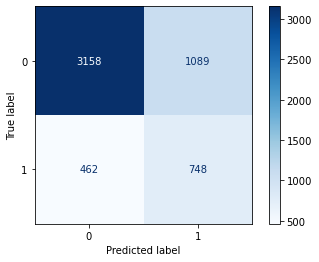

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      4247
           1       0.41      0.62      0.49      1210

    accuracy                           0.72      5457
   macro avg       0.64      0.68      0.65      5457
weighted avg       0.77      0.72      0.73      5457



In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p1, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

In [26]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.49097472924187713
0.646911033109562
0.7157778999450247
0.733694715507612


In [27]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.40718562874251496
0.6397806596751249
0.7157778999450247
0.7692274452610396


In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.6808827621636663

#### Curva ROC:

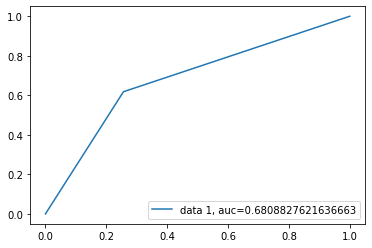

In [29]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 2 (01/09/2020 até 28/02/2021):

In [30]:
Pre_processing_models = Pre_processing_models(periodo_2)
Pre_processing_models.run_graves()

df_p2 = Pre_processing_models.df
df_p2 = df_p2[list_features]
df_p2

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
431,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.736842,0,1,2020-09-16
432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.166667,0,1,2020-09-27
433,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.798246,1,0,2020-09-30
434,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.500000,0,1,2020-09-30
436,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.736842,1,0,2020-11-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36245,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.666667,1,0,2021-01-18
36246,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.570175,1,0,2020-12-30
36247,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.429825,0,1,2021-02-02
36351,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0.798246,1,0,2021-01-13


In [31]:
df2_p2 = pd.DataFrame()
df2_p2 = df_p2
df2_p2.set_index('data_notificacao', inplace=True)
df2_p2.sort_index(inplace=True)
df2_p2

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2020-09-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.201754,1,0
2020-09-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.500000,0,1
2020-09-02,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.026316,0,1
2020-09-02,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.508772,0,1
2020-09-02,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.552632,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-27,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.789474,0,1
2021-02-27,1,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0.464912,1,0
2021-02-27,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.368421,1,0


In [70]:
"""df_p2 = df_p2.sort_values(by='data_notificacao')
df_p2 = df_p2.drop(labels="data_notificacao", axis=1)
df_p2"""

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
10936,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.201754,1,0
25517,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.500000,0,1
32619,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.026316,0,1
8129,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.508772,0,1
25364,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.552632,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31948,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.789474,0,1
34657,1,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0.464912,1,0
11805,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.368421,1,0
28906,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.324561,0,1


In [32]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_2 = []
std_test_scores_2 = []
best_scores_2 = []
best_params_2 = []

X = df2_p2.drop(labels=['death'], axis=1)
y = df2_p2['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_2.append(mean_test_score)
    std_test_scores_2.append(std_test_score)
    best_scores_2.append(best_score)
    best_params_2.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_2)
std_test_scores_periodos_6meses.append(std_test_scores_2)
best_scores_periodos_6meses.append(best_scores_2)
best_params_periodos_6meses.append(best_params_2)


########################################
mean_test_score: 0.7490232063845423
std_test_score: 0.020755822974177943

best_score: 0.7706525527345107
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7490232063845423
std_test_score: 0.020755822974177943

best_score: 0.7706525527345107
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7490232063845423
std_test_score: 0.020755822974177943

best_score: 0.7706525527345107
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7490232063845423
std_test_score: 0.020755822974177943

best_score: 0.7706525527345107
best_params_: {'c

In [33]:
print(f'Best_score = {max(best_scores_periodos_6meses[1])}')
index = best_scores_periodos_6meses[1].index(max(best_scores_periodos_6meses[1]))
print(f'Best_params = {best_params_periodos_6meses[1][index]}')

Best_score = 0.7706525527345107
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [34]:
# parametrizando o modelo final
final_cl_p2 = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p2.fit(X_train, y_train)


preds = final_cl_p2.predict(X_test)

accuracy_score(y_test, preds)

0.7161442933175636

In [35]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.4748358862144421
0.6401732105302356
0.7161442933175636
0.6905272744111544


In [36]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.6656441717791411
0.6969246499921347
0.7161442933175636
0.7064512296962693


In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.635113111427708

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


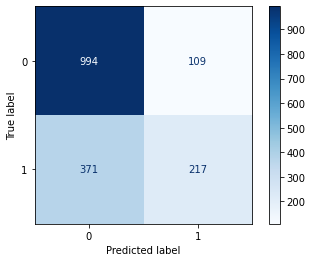

              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1103
           1       0.67      0.37      0.47       588

    accuracy                           0.72      1691
   macro avg       0.70      0.64      0.64      1691
weighted avg       0.71      0.72      0.69      1691



In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p2, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

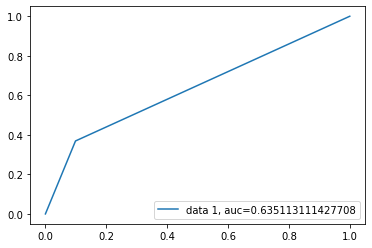

In [39]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 3 (01/03/2021 até 31/08/2021):

In [40]:
Pre_processing_models = Pre_processing_models(periodo_3)
Pre_processing_models.run_graves()

df_p3 = Pre_processing_models.df
df_p3 = df_p3[list_features]
df_p3

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
952,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.429825,0,1,2021-05-07
953,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.315789,1,0,2021-04-27
954,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.368421,1,0,2021-04-14
955,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.394737,0,1,2021-04-10
956,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.377193,0,1,2021-03-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36364,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.622807,1,0,2021-06-09
36366,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0.508772,1,0,2021-05-29
36371,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.403509,0,1,2021-07-01
36372,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.622807,0,1,2021-06-18


In [41]:
df2_p3 = pd.DataFrame()
df2_p3 = df_p3
df2_p3.set_index('data_notificacao', inplace=True)
df2_p3.sort_index(inplace=True)
df2_p3

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2021-03-02,0,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0.552632,1,0
2021-03-02,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.421053,1,0
2021-03-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.684211,0,1
2021-03-02,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.622807,1,0
2021-03-02,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0.543860,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.324561,1,0
2021-08-30,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.508772,1,0
2021-08-30,1,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0.657895,0,1


In [80]:
"""df_p3 = df_p3.sort_values(by='data_notificacao')
df_p3 = df_p3.drop(labels="data_notificacao", axis=1)
df_p3"""

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
35396,0,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0.552632,1,0
23696,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.421053,1,0
23697,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.684211,0,1
1707,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.622807,1,0
13171,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0.543860,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12009,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.324561,1,0
31814,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.508772,1,0
2336,1,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0.657895,0,1
14303,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.657895,1,0


In [42]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_3 = []
std_test_scores_3 = []
best_scores_3 = []
best_params_3 = []

X = df2_p3.drop(labels=['death'], axis=1)
y = df2_p3['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_3.append(mean_test_score)
    std_test_scores_3.append(std_test_score)
    best_scores_3.append(best_score)
    best_params_3.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_3)
std_test_scores_periodos_6meses.append(std_test_scores_3)
best_scores_periodos_6meses.append(best_scores_3)
best_params_periodos_6meses.append(best_params_3)


########################################
mean_test_score: 0.7686540560335126
std_test_score: 0.021383597770070456

best_score: 0.7845850869829247
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7686540560335126
std_test_score: 0.021383597770070456

best_score: 0.7845850869829247
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7686540560335126
std_test_score: 0.021383597770070456

best_score: 0.7845850869829247
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7686540560335126
std_test_score: 0.021383597770070456

best_score: 0.7845850869829247
best_params_: {'c

In [43]:
print(f'Best_score = {max(best_scores_periodos_6meses[2])}')
index = best_scores_periodos_6meses[2].index(max(best_scores_periodos_6meses[2]))
print(f'Best_params = {best_params_periodos_6meses[2][index]}')

Best_score = 0.7845850869829247
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [44]:
# parametrizando o modelo final
final_cl_p3 = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p3.fit(X_train, y_train)


preds = final_cl_p3.predict(X_test)

accuracy_score(y_test, preds)

0.740358126721763

In [45]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.5245901639344261
0.6730009085896669
0.7403581267217629
0.732181226189794


In [46]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.5834502103786816
0.6874348267776567
0.740358126721763
0.7288997667879917


In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.6651421861490538

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


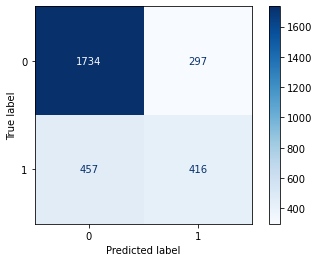

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      2031
           1       0.58      0.48      0.52       873

    accuracy                           0.74      2904
   macro avg       0.69      0.67      0.67      2904
weighted avg       0.73      0.74      0.73      2904



In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p3, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

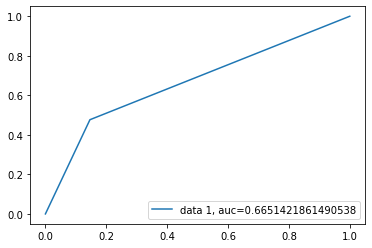

In [49]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 4 (01/09/2021 até 28/02/2022):

In [72]:
Pre_processing_models = Pre_processing_models(periodo_4)
Pre_processing_models.run_graves()

df_p4 = Pre_processing_models.df
df_p4 = df_p4[list_features]
df_p4

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
1804,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.252174,0,1,2021-09-18
1805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.243478,1,0,2021-09-25
1807,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.721739,0,1,2021-09-08
1808,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,1,0,2021-10-07
1809,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0.530435,0,1,2021-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36360,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.234783,0,1,2022-02-26
36361,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.582609,0,1,2021-12-30
36368,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.756522,0,1,2022-02-02
36385,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.800000,0,1,2021-11-22


In [73]:
df2_p4 = pd.DataFrame()
df2_p4 = df_p4
df2_p4.set_index('data_notificacao', inplace=True)
df2_p4.sort_index(inplace=True)
df2_p4

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2021-09-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.617391,0,1
2021-09-02,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0.426087,0,1
2021-09-02,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0.382609,0,1
2021-09-02,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.765217,1,0
2021-09-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.095652,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-27,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.591304,1,0
2022-02-27,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.460870,1,0
2022-02-27,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,1


In [90]:
"""df_p4 = df_p4.sort_values(by='data_notificacao')
df_p4 = df_p4.drop(labels="data_notificacao", axis=1)
df_p4"""

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
35396,0,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0.552632,1,0
23696,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.421053,1,0
23697,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.684211,0,1
1707,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.622807,1,0
13171,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0.543860,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12009,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.324561,1,0
31814,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.508772,1,0
2336,1,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0.657895,0,1
14303,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.657895,1,0


In [74]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_4 = []
std_test_scores_4 = []
best_scores_4 = []
best_params_4 = []

X = df2_p4.drop(labels=['death'], axis=1)
y = df2_p4['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_4.append(mean_test_score)
    std_test_scores_4.append(std_test_score)
    best_scores_4.append(best_score)
    best_params_4.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_4)
std_test_scores_periodos_6meses.append(std_test_scores_4)
best_scores_periodos_6meses.append(best_scores_4)
best_params_periodos_6meses.append(best_params_4)

########################################
mean_test_score: 0.6434038714770254
std_test_score: 0.04421551684668493

best_score: 0.6795932090150494
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.6434038714770254
std_test_score: 0.04421551684668493

best_score: 0.6795932090150494
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.6434038714770254
std_test_score: 0.04421551684668493

best_score: 0.6795932090150494
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.6434038714770254
std_test_score: 0.04421551684668493

best_score: 0.6795932090150494
best_params_: {'colsa

In [75]:
print(f'Best_score = {max(best_scores_periodos_6meses[3])}')
index = best_scores_periodos_6meses[3].index(max(best_scores_periodos_6meses[3]))
print(f'Best_params = {best_params_periodos_6meses[3][index]}')

Best_score = 0.7845850869829247
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [76]:
# parametrizando o modelo final
final_cl_p4 = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p4.fit(X_train, y_train)


preds = final_cl_p4.predict(X_test)

accuracy_score(y_test, preds)

0.7270861833105335

In [77]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.1564482029598309
0.49682875264270615
0.7270861833105335
0.6574734717132834


In [78]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.42528735632183906
0.5857345872518286
0.7270861833105335
0.6614586565689919


In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.524693260396402

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


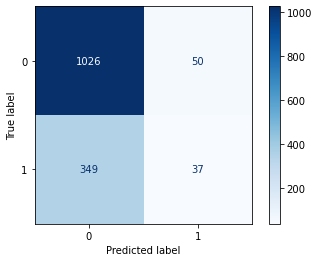

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      1076
           1       0.43      0.10      0.16       386

    accuracy                           0.73      1462
   macro avg       0.59      0.52      0.50      1462
weighted avg       0.66      0.73      0.66      1462



In [80]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p4, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

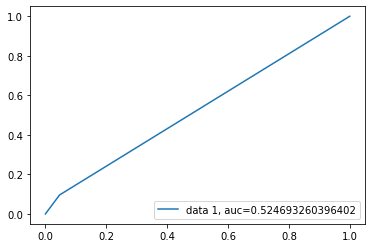

In [81]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 5 (01/03/2022 até 13/06/2022):

In [82]:
Pre_processing_models = Pre_processing_models(periodo_5)
Pre_processing_models.run_graves()

df_p5 = Pre_processing_models.df
df_p5 = df_p5[list_features]
df_p5

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
2165,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.281818,0,1,2022-03-02
2169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.600000,1,0,2022-03-07
2172,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.554545,0,1,2022-03-12
2182,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.554545,0,1,2022-03-14
2185,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2022-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.700000,0,1,2022-06-08
36431,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.672727,0,1,2022-06-09
36432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.672727,0,1,2022-06-10
36433,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.663636,1,0,2022-06-12


In [83]:
df2_p5 = pd.DataFrame()
df2_p5 = df_p5
df2_p5.set_index('data_notificacao', inplace=True)
df2_p5.sort_index(inplace=True)
df2_p5

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2022-03-02,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.281818,0,1
2022-03-02,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.636364,1,0
2022-03-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.681818,0,1
2022-03-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.836364,0,1
2022-03-02,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.427273,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-12,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2022-06-12,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,1
2022-06-12,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.581818,0,1


In [100]:
"""df_p5 = df_p5.sort_values(by='data_notificacao')
df_p5 = df_p5.drop(labels="data_notificacao", axis=1)
df_p5"""

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
35396,0,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0.552632,1,0
23696,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.421053,1,0
23697,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.684211,0,1
1707,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.622807,1,0
13171,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0.543860,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12009,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.324561,1,0
31814,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.508772,1,0
2336,1,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0.657895,0,1
14303,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.657895,1,0


In [84]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_5 = []
std_test_scores_5 = []
best_scores_5 = []
best_params_5 = []

X = df2_p5.drop(labels=['death'], axis=1)
y = df2_p5['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_5.append(mean_test_score)
    std_test_scores_5.append(std_test_score)
    best_scores_5.append(best_score)
    best_params_5.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_5)
std_test_scores_periodos_6meses.append(std_test_scores_5)
best_scores_periodos_6meses.append(best_scores_5)
best_params_periodos_6meses.append(best_params_5)

########################################
mean_test_score: 0.757087285934312
std_test_score: 0.0584386421993047

best_score: 0.7664155821001961
best_params_: {'colsample_bytree': 0.9, 'gamma': 1, 'max_depth': 7, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.757087285934312
std_test_score: 0.0584386421993047

best_score: 0.7664155821001961
best_params_: {'colsample_bytree': 0.9, 'gamma': 1, 'max_depth': 7, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.757087285934312
std_test_score: 0.0584386421993047

best_score: 0.7664155821001961
best_params_: {'colsample_bytree': 0.9, 'gamma': 1, 'max_depth': 7, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.757087285934312
std_test_score: 0.0584386421993047

best_score: 0.7664155821001961
best_params_: {'colsample_byt

In [85]:
X_train.index

Index(['2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02',
       '2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02',
       ...
       '2022-05-05', '2022-05-05', '2022-05-05', '2022-05-05', '2022-05-06',
       '2022-05-06', '2022-05-06', '2022-05-06', '2022-05-06', '2022-05-06'],
      dtype='object', name='data_notificacao', length=1109)

In [86]:
X_test.index

Index(['2022-05-06', '2022-05-06', '2022-05-07', '2022-05-07', '2022-05-07',
       '2022-05-07', '2022-05-07', '2022-05-08', '2022-05-08', '2022-05-08',
       ...
       '2022-06-11', '2022-06-11', '2022-06-12', '2022-06-12', '2022-06-12',
       '2022-06-12', '2022-06-12', '2022-06-12', '2022-06-12', '2022-06-12'],
      dtype='object', name='data_notificacao', length=554)

In [87]:
print(f'Best_score = {max(best_scores_periodos_6meses[4])}')
index = best_scores_periodos_6meses[4].index(max(best_scores_periodos_6meses[4]))
print(f'Best_params = {best_params_periodos_6meses[4][index]}')

Best_score = 0.7845850869829247
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [88]:
# parametrizando o modelo final
final_cl_p5 = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p5.fit(X_train, y_train)


preds = final_cl_p5.predict(X_test)

accuracy_score(y_test, preds)

0.8339350180505415

In [89]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.3698630136986301
0.6371144590322673
0.8339350180505415
0.8551607646113358


In [90]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.28421052631578947
0.6159614723082215
0.8339350180505415
0.8866319192190145


In [91]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.6971114489533388

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


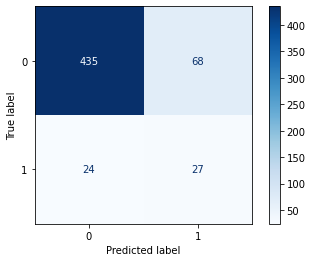

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       503
           1       0.28      0.53      0.37        51

    accuracy                           0.83       554
   macro avg       0.62      0.70      0.64       554
weighted avg       0.89      0.83      0.86       554



In [92]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p5, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

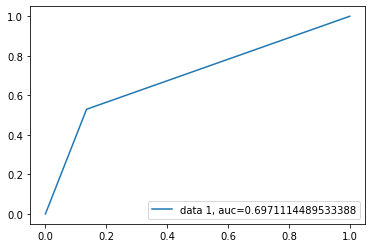

In [93]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Análise geral para os períodos de 6 meses:

In [65]:
from statistics import mean

print(f'Maior score: {max(best_scores_periodos_6meses)} \nMenor Score: {min(best_params_periodos_6meses)} \nMedia Scores: {mean(best_params_periodos_6meses)} ')
print(f'Desvio padrão médio: {mean(std_test_scores_periodos_6meses)} ')

TypeError: '<' not supported between instances of 'dict' and 'dict'

In [ ]:
pyplot.boxplot(best_scores_periodos_6meses, showmeans=True)
pyplot.show()

## Aplicando para os períodos de 3 meses:

In [51]:
df = pd.read_csv(r'C:\Users\mcacs\Desktop\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

In [52]:
periodo_1 = df[(df['data_notificacao'] > '2020-02-26') & (df['data_notificacao'] < '2020-05-31')]
periodo_2 = df[(df['data_notificacao'] > '2020-06-01') & (df['data_notificacao'] < '2020-08-31')]
periodo_3 = df[(df['data_notificacao'] > '2020-09-01') & (df['data_notificacao'] < '2020-11-30')]
periodo_4 = df[(df['data_notificacao'] > '2020-12-01') & (df['data_notificacao'] < '2021-02-28')]
periodo_5 = df[(df['data_notificacao'] > '2021-03-01') & (df['data_notificacao'] < '2021-05-31')]
periodo_6 = df[(df['data_notificacao'] > '2021-06-01') & (df['data_notificacao'] < '2021-08-31')]
periodo_7 = df[(df['data_notificacao'] > '2021-09-01') & (df['data_notificacao'] < '2021-11-30')]
periodo_8 = df[(df['data_notificacao'] > '2021-12-01') & (df['data_notificacao'] < '2022-02-28')]
periodo_9 = df[(df['data_notificacao'] > '2022-03-01') & (df['data_notificacao'] < '2025-05-31')]
periodo_10 = df[(df['data_notificacao'] > '2022-06-01') & (df['data_notificacao'] < '2022-06-13')]

In [53]:
mean_test_scores_periodos_3meses = []
std_test_scores_periodos_3meses = []
best_scores_periodos_3meses = []
best_params_periodos_3meses = []

#### Período 1 (26/02/2020 até 31/05/2020):

In [54]:
Pre_processing_models = Pre_processing_models(periodo_1)
Pre_processing_models.run_graves()

df_p13m = Pre_processing_models.df
df_p13m = df_p13m[list_features]
df_p13m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.486239,0,1
24,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.633028,0,1
25,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.642202,0,1
26,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.596330,0,1
27,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.467890,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36271,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.532110,1,0
36272,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.871560,1,0
36274,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.614679,0,1
36275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.623853,0,1


In [55]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_1 = []
std_test_scores_1 = []
best_scores_1 = []
best_params_1 = []

X = df_p13m.drop("death",axis=1)
y = df_p13m['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_1.append(mean_test_score)
    std_test_scores_1.append(std_test_score)
    best_scores_1.append(best_score)
    best_params_1.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_1)
std_test_scores_periodos_3meses.append(std_test_scores_1)
best_scores_periodos_3meses.append(best_scores_1)
best_params_periodos_3meses.append(best_params_1)


########################################
mean_test_score: 0.8779546663500245
std_test_score: 0.008229467746476742

best_score: 0.8844949177031057
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.874848714361376
std_test_score: 0.009490876344115558

best_score: 0.8806734092951594
best_params_: {'colsample_bytree': 0.9, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.8731960437199755
std_test_score: 0.00808448569601509

best_score: 0.8798741091139517
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.8737041581519253
std_test_score: 0.00937945451762354

best_score: 0.8806526619798816
best_params_: {'cols

In [61]:
print(f'Best_score = {max(best_scores_periodos_3meses[0])}')
index = best_scores_periodos_3meses[0].index(max(best_scores_periodos_3meses[0]))
print(f'Best_params = {best_params_periodos_3meses[0][index]}')

Best_score = 0.8844949177031057
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [62]:
# parametrizando o modelo final
final_cl_p13m = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p13m.fit(X_train, y_train)


preds = final_cl_p13m.predict(X_test)

accuracy_score(y_test, preds)

0.8448426573426573

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


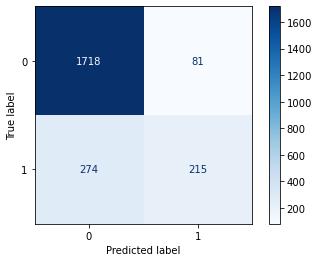

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1799
           1       0.73      0.44      0.55       489

    accuracy                           0.84      2288
   macro avg       0.79      0.70      0.73      2288
weighted avg       0.83      0.84      0.83      2288



In [63]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p13m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Período 2 (01/06/2020 até 31/08/2020):

In [64]:
Pre_processing_models = Pre_processing_models(periodo_2)
Pre_processing_models.run_graves()

df_p23m = Pre_processing_models.df
df_p23m = df_p23m[list_features]
df_p23m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.803738,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.635514,0,1
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.869159,0,1
6,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.626168,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36251,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.644860,1,0
36252,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.654206,1,0
36261,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.747664,0,1
36270,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.766355,1,0


In [65]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_2 = []
std_test_scores_2 = []
best_scores_2 = []
best_params_2 = []

X = df_p23m.drop("death",axis=1)
y = df_p23m['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_2.append(mean_test_score)
    std_test_scores_2.append(std_test_score)
    best_scores_2.append(best_score)
    best_params_2.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_2)
std_test_scores_periodos_3meses.append(std_test_scores_2)
best_scores_periodos_3meses.append(best_scores_2)
best_params_periodos_3meses.append(best_params_2)


########################################
mean_test_score: 0.7601559576792557
std_test_score: 0.015561140750768985

best_score: 0.78338854004797
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.750633592632596
std_test_score: 0.017421598497057687

best_score: 0.7737991704546658
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7706797538460785
std_test_score: 0.018030370558738445

best_score: 0.791531838680036
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7587278876352731
std_test_score: 0.018385264600761002

best_score: 0.7841852606053362
best_params_: {'colsa

In [66]:
print(f'Best_score = {max(best_scores_periodos_3meses[1])}')
index = best_scores_periodos_3meses[1].index(max(best_scores_periodos_3meses[1]))
print(f'Best_params = {best_params_periodos_3meses[1][index]}')

Best_score = 0.791531838680036
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [67]:
# parametrizando o modelo final
final_cl_p23m = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p23m.fit(X_train, y_train)


preds = final_cl_p23m.predict(X_test)

accuracy_score(y_test, preds)

0.7816091954022989

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


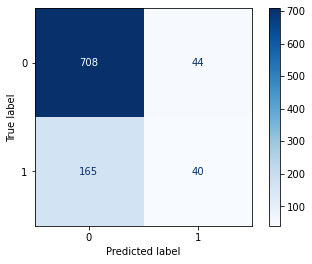

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       752
           1       0.48      0.20      0.28       205

    accuracy                           0.78       957
   macro avg       0.64      0.57      0.57       957
weighted avg       0.74      0.78      0.74       957



In [68]:
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p23m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Período 3 (01/09/2020 até 30/11/2020):

In [69]:
Pre_processing_models = Pre_processing_models(periodo_3)
Pre_processing_models.run_graves()

df_p33m = Pre_processing_models.df
df_p33m = df_p33m[list_features]
df_p33m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
431,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.807692,0,1
432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.182692,0,1
433,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.875000,1,0
434,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.548077,0,1
436,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.807692,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36168,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0.576923,1,0
36169,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.586538,0,1
36235,1,0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0.605769,0,1
36236,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0.519231,0,1


In [70]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_3 = []
std_test_scores_3 = []
best_scores_3 = []
best_params_3 = []

X = df_p33m.drop("death",axis=1)
y = df_p33m['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_3.append(mean_test_score)
    std_test_scores_3.append(std_test_score)
    best_scores_3.append(best_score)
    best_params_3.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_3)
std_test_scores_periodos_3meses.append(std_test_scores_3)
best_scores_periodos_3meses.append(best_scores_3)
best_params_periodos_3meses.append(best_params_3)

########################################
mean_test_score: 0.7684099982869133
std_test_score: 0.021821268560940233

best_score: 0.7894381962195954
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.738273586153959
std_test_score: 0.02194113141926321

best_score: 0.7687028587407215
best_params_: {'colsample_bytree': 0.9, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7463931770859794
std_test_score: 0.02254574105838539

best_score: 0.7718191806724155
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.742863272545862
std_test_score: 0.022275818358129654

best_score: 0.772130832788906
best_params_: {'colsam

In [72]:
print(f'Best_score = {max(best_scores_periodos_3meses[2])}')
index = best_scores_periodos_3meses[2].index(max(best_scores_periodos_3meses[2]))
print(f'Best_params = {best_params_periodos_3meses[2][index]}')

Best_score = 0.7894381962195954
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [73]:
# parametrizando o modelo final
final_cl_p33m = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p33m.fit(X_train, y_train)


preds = final_cl_p33m.predict(X_test)

accuracy_score(y_test, preds)

0.7615740740740741

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


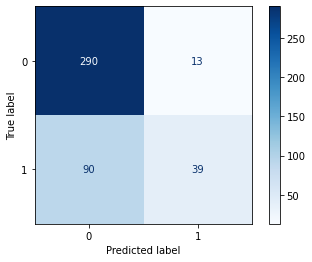

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       303
           1       0.75      0.30      0.43       129

    accuracy                           0.76       432
   macro avg       0.76      0.63      0.64       432
weighted avg       0.76      0.76      0.72       432



In [74]:
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p33m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Período 4 (01/12/2020 até 28/02/2021):

In [75]:
Pre_processing_models = Pre_processing_models(periodo_4)
Pre_processing_models.run_graves()

df_p43m = Pre_processing_models.df
df_p43m = df_p43m[list_features]
df_p43m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
937,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.517544,1,0
938,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0.350877,0,1
939,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.771930,1,0
970,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.026316,1,0
979,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.456140,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36245,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.666667,1,0
36246,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.570175,1,0
36247,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.429825,0,1
36351,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0.798246,1,0


In [76]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_4 = []
std_test_scores_4 = []
best_scores_4 = []
best_params_4 = []

X = df_p43m.drop("death",axis=1)
y = df_p43m['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_4.append(mean_test_score)
    std_test_scores_4.append(std_test_score)
    best_scores_4.append(best_score)
    best_params_4.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_4)
std_test_scores_periodos_3meses.append(std_test_scores_4)
best_scores_periodos_3meses.append(best_scores_4)
best_params_periodos_3meses.append(best_params_4)

########################################
mean_test_score: 0.7552636316286517
std_test_score: 0.01906869356713944

best_score: 0.7738684844720696
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7464993431831853
std_test_score: 0.01837025276189227

best_score: 0.7698745471075381
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7491378934012384
std_test_score: 0.016664072068028824

best_score: 0.7699771944025824
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7409394782070595
std_test_score: 0.022943594871965584

best_score: 0.7644780924441094
best_params_: {'col

In [77]:
print(f'Best_score = {max(best_scores_periodos_3meses[3])}')
index = best_scores_periodos_3meses[3].index(max(best_scores_periodos_3meses[3]))
print(f'Best_params = {best_params_periodos_3meses[3][index]}')

Best_score = 0.7738684844720696
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [78]:
# parametrizando o modelo final
final_cl_p43m = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p43m.fit(X_train, y_train)


preds = final_cl_p43m.predict(X_test)

accuracy_score(y_test, preds)

0.7183098591549296

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


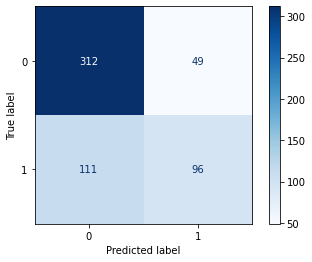

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       361
           1       0.66      0.46      0.55       207

    accuracy                           0.72       568
   macro avg       0.70      0.66      0.67       568
weighted avg       0.71      0.72      0.70       568



In [79]:
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p43m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Período 5 (01/03/2021 até 31/05/2021):

In [80]:
Pre_processing_models = Pre_processing_models(periodo_5)
Pre_processing_models.run_graves()

df_p53m = Pre_processing_models.df
df_p53m = df_p53m[list_features]
df_p53m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
952,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.429825,0,1
953,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.315789,1,0
954,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.368421,1,0
955,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.394737,0,1
956,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.377193,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36332,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.333333,1,0
36333,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.631579,1,0
36334,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0.438596,1,0
36362,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.491228,1,0


In [83]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_5 = []
std_test_scores_5 = []
best_scores_5 = []
best_params_5 = []

X = df_p53m.drop("death",axis=1)
y = df_p53m['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_5.append(mean_test_score)
    std_test_scores_5.append(std_test_score)
    best_scores_5.append(best_score)
    best_params_5.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_5)
std_test_scores_periodos_3meses.append(std_test_scores_5)
best_scores_periodos_3meses.append(best_scores_5)
best_params_periodos_3meses.append(best_params_5)

########################################
mean_test_score: 0.7640094435704383
std_test_score: 0.014253038088366803

best_score: 0.7821556099364813
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7620492877647913
std_test_score: 0.016312863581132604

best_score: 0.7815129545762622
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7604659834493729
std_test_score: 0.016159038203677444

best_score: 0.7795556591768754
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7579035620173586
std_test_score: 0.017473880472969563

best_score: 0.7794781460870537
best_params_: {'c

In [82]:
print(f'Best_score = {max(best_scores_periodos_3meses[4])}')
index = best_scores_periodos_3meses[4].index(max(best_scores_periodos_3meses[4]))
print(f'Best_params = {best_params_periodos_3meses[4][index]}')

Best_score = 0.7892452017413062
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [84]:
# parametrizando o modelo final
final_cl_p53m = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p53m.fit(X_train, y_train)


preds = final_cl_p53m.predict(X_test)

accuracy_score(y_test, preds)

0.72078501338091

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


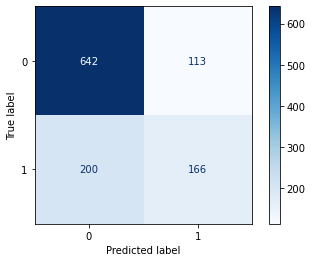

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       755
           1       0.59      0.45      0.51       366

    accuracy                           0.72      1121
   macro avg       0.68      0.65      0.66      1121
weighted avg       0.71      0.72      0.71      1121



In [85]:
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p53m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Período 6 (01/06/2021 até 31/08/2021):

In [86]:
Pre_processing_models = Pre_processing_models(periodo_6)
Pre_processing_models.run_graves()

df_p63m = Pre_processing_models.df
df_p63m = df_p63m[list_features]
df_p63m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
1661,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.456140,1,0
1663,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.438596,0,1
1664,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.684211,0,1
1665,1,0,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0.675439,0,1
1667,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.605263,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36359,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.570175,0,1
36364,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.622807,1,0
36371,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.403509,0,1
36372,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.622807,0,1


In [87]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_6 = []
std_test_scores_6 = []
best_scores_6 = []
best_params_6 = []

X = df_p63m.drop("death",axis=1)
y = df_p63m['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_6.append(mean_test_score)
    std_test_scores_6.append(std_test_score)
    best_scores_6.append(best_score)
    best_params_6.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_6)
std_test_scores_periodos_3meses.append(std_test_scores_6)
best_scores_periodos_3meses.append(best_scores_6)
best_params_periodos_3meses.append(best_params_6)

########################################
mean_test_score: 0.7399017029375274
std_test_score: 0.024921976518225582

best_score: 0.7657436142635038
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7380681007671223
std_test_score: 0.024056967313260024

best_score: 0.7613586301949415
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7333189160142124
std_test_score: 0.019398224102903705

best_score: 0.7578230683621635
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.725223788643199
std_test_score: 0.02823332331384283

best_score: 0.7527515411412077
best_params_: {'col

In [88]:
print(f'Best_score = {max(best_scores_periodos_3meses[5])}')
index = best_scores_periodos_3meses[5].index(max(best_scores_periodos_3meses[5]))
print(f'Best_params = {best_params_periodos_3meses[5][index]}')

Best_score = 0.7892452017413062
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [89]:
# parametrizando o modelo final
final_cl_p63m = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p63m.fit(X_train, y_train)


preds = final_cl_p63m.predict(X_test)

accuracy_score(y_test, preds)

0.739424703891709

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


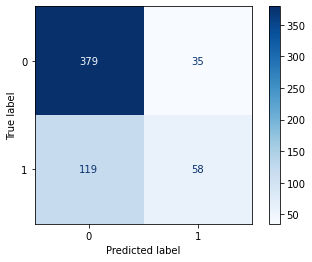

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       414
           1       0.62      0.33      0.43       177

    accuracy                           0.74       591
   macro avg       0.69      0.62      0.63       591
weighted avg       0.72      0.74      0.71       591



In [90]:
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p63m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Período 7 (01/09/2021 até 30/11/2021):

In [91]:
Pre_processing_models = Pre_processing_models(periodo_7)
Pre_processing_models.run_graves()

df_p73m = Pre_processing_models.df
df_p73m = df_p73m[list_features]
df_p73m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
1804,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.258929,0,1
1805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.250000,1,0
1807,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.741071,0,1
1808,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.589286,1,0
1809,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0.544643,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.544643,1,0
36323,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.500000,1,0
36335,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.669643,0,1
36340,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.687500,0,1


In [92]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_7 = []
std_test_scores_7 = []
best_scores_7 = []
best_params_7 = []

X = df_p73m.drop("death",axis=1)
y = df_p73m['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_7.append(mean_test_score)
    std_test_scores_7.append(std_test_score)
    best_scores_7.append(best_score)
    best_params_7.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_7)
std_test_scores_periodos_3meses.append(std_test_scores_7)
best_scores_periodos_3meses.append(best_scores_7)
best_params_periodos_3meses.append(best_params_7)

########################################
mean_test_score: 0.6890653214720753
std_test_score: 0.032775950754092106

best_score: 0.7150465791259145
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.6932871696984573
std_test_score: 0.029974001753898964

best_score: 0.7179517730898262
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.684008180452044
std_test_score: 0.030370795159806514

best_score: 0.7124133357750694
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.6849517896245286
std_test_score: 0.03366442219934593

best_score: 0.7162480832991969
best_params_: {'col

In [93]:
print(f'Best_score = {max(best_scores_periodos_3meses[6])}')
index = best_scores_periodos_3meses[6].index(max(best_scores_periodos_3meses[6]))
print(f'Best_params = {best_params_periodos_3meses[6][index]}')

Best_score = 0.7703917939056706
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [94]:
# parametrizando o modelo final
final_cl_p73m = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p73m.fit(X_train, y_train)


preds = final_cl_p73m.predict(X_test)

accuracy_score(y_test, preds)

0.7822085889570553

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


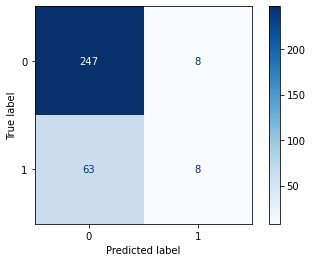

              precision    recall  f1-score   support

           0       0.80      0.97      0.87       255
           1       0.50      0.11      0.18        71

    accuracy                           0.78       326
   macro avg       0.65      0.54      0.53       326
weighted avg       0.73      0.78      0.72       326



In [95]:
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p73m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Período 8 (01/12/2021 até 28/02/2022):

In [96]:
Pre_processing_models = Pre_processing_models(periodo_8)
Pre_processing_models.run_graves()

df_p83m = Pre_processing_models.df
df_p83m = df_p83m[list_features]
df_p83m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
1825,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.495652,0,1
1826,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.713043,1,0
1827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.721739,0,1
1828,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.643478,1,0
1829,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.365217,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36350,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.643478,1,0
36360,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.234783,0,1
36361,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.582609,0,1
36368,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.756522,0,1


In [97]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_8 = []
std_test_scores_8 = []
best_scores_8 = []
best_params_8 = []

X = df_p83m.drop("death",axis=1)
y = df_p83m['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_8.append(mean_test_score)
    std_test_scores_8.append(std_test_score)
    best_scores_8.append(best_score)
    best_params_8.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_8)
std_test_scores_periodos_3meses.append(std_test_scores_8)
best_scores_periodos_3meses.append(best_scores_8)
best_params_periodos_3meses.append(best_params_8)

########################################
mean_test_score: 0.6163172245193247
std_test_score: 0.026155492030045142

best_score: 0.6521606528868366
best_params_: {'colsample_bytree': 0.9, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.609713520353265
std_test_score: 0.02510796628756922

best_score: 0.6386520536744237
best_params_: {'colsample_bytree': 0.9, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.6083918617739205
std_test_score: 0.024480284888371406

best_score: 0.6463245632103305
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.6101189118314616
std_test_score: 0.02667442286042768

best_score: 0.6490471235362815
best_params_: {'cols

In [98]:
print(f'Best_score = {max(best_scores_periodos_3meses[7])}')
index = best_scores_periodos_3meses[7].index(max(best_scores_periodos_3meses[7]))
print(f'Best_params = {best_params_periodos_3meses[7][index]}')

Best_score = 0.7305677976078252
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [99]:
# parametrizando o modelo final
final_cl_p83m = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p83m.fit(X_train, y_train)


preds = final_cl_p83m.predict(X_test)

accuracy_score(y_test, preds)

0.7417582417582418

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


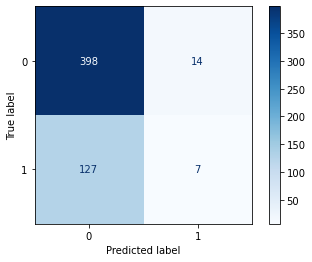

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       412
           1       0.33      0.05      0.09       134

    accuracy                           0.74       546
   macro avg       0.55      0.51      0.47       546
weighted avg       0.65      0.74      0.66       546



In [100]:
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p83m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Período 9 (01/03/2022 até 31/05/2022):

In [101]:
Pre_processing_models = Pre_processing_models(periodo_9)
Pre_processing_models.run_graves()

df_p93m = Pre_processing_models.df
df_p93m = df_p93m[list_features]
df_p93m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
2165,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.281818,0,1
2169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.600000,1,0
2172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0.554545,0,1
2182,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.554545,0,1
2185,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.700000,0,1
36431,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.672727,0,1
36432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.672727,0,1
36433,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.663636,1,0


In [102]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_9 = []
std_test_scores_9 = []
best_scores_9 = []
best_params_9 = []

X = df_p93m.drop("death",axis=1)
y = df_p93m['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_9.append(mean_test_score)
    std_test_scores_9.append(std_test_score)
    best_scores_9.append(best_score)
    best_params_9.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_9)
std_test_scores_periodos_3meses.append(std_test_scores_9)
best_scores_periodos_3meses.append(best_scores_9)
best_params_periodos_3meses.append(best_params_9)

########################################
mean_test_score: 0.7909870685167942
std_test_score: 0.025631740509153997

best_score: 0.8084958983184799
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7969005285535835
std_test_score: 0.024408255029103435

best_score: 0.8097820841220164
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7957512597240253
std_test_score: 0.02511859128391767

best_score: 0.8114982561185308
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.793169248038497
std_test_score: 0.025134026972042

best_score: 0.8056603055822005
best_params_: {'colsam

In [103]:
print(f'Best_score = {max(best_scores_periodos_3meses[8])}')
index = best_scores_periodos_3meses[8].index(max(best_scores_periodos_3meses[8]))
print(f'Best_params = {best_params_periodos_3meses[8][index]}')

Best_score = 0.6637438059185742
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [104]:
# parametrizando o modelo final
final_cl_p93m = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p93m.fit(X_train, y_train)


preds = final_cl_p93m.predict(X_test)

accuracy_score(y_test, preds)

0.7597597597597597

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


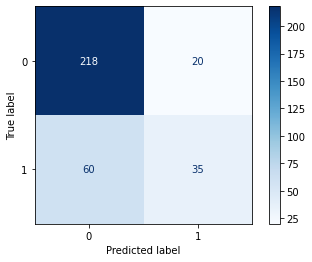

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       238
           1       0.64      0.37      0.47        95

    accuracy                           0.76       333
   macro avg       0.71      0.64      0.66       333
weighted avg       0.74      0.76      0.74       333



In [105]:
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p93m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Período 10 (01/06/2022 até 13/06/2022):

In [106]:
Pre_processing_models = Pre_processing_models(periodo_10)
Pre_processing_models.run_graves()

df_p103m = Pre_processing_models.df
df_p103m = df_p103m[list_features]
df_p103m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
3889,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,1
3893,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.000000,1,0
3894,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
3895,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
3975,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.833333,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.754902,0,1
36431,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.725490,0,1
36432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.725490,0,1
36433,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.715686,1,0


In [107]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_10 = []
std_test_scores_10 = []
best_scores_10 = []
best_params_10 = []

X = df_p103m.drop("death",axis=1)
y = df_p103m['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_10.append(mean_test_score)
    std_test_scores_10.append(std_test_score)
    best_scores_10.append(best_score)
    best_params_10.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_10)
std_test_scores_periodos_3meses.append(std_test_scores_10)
best_scores_periodos_3meses.append(best_scores_10)
best_params_periodos_3meses.append(best_params_10)

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


########################################
mean_test_score: nan
std_test_score: nan

best_score: nan
best_params_: {'colsample_bytree': 0.5, 'gamma': 0.25, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: nan
std_test_score: nan

best_score: nan
best_params_: {'colsample_bytree': 0.5, 'gamma': 0.25, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: nan
std_test_score: nan

best_score: nan
best_params_: {'colsample_bytree': 0.5, 'gamma': 0.25, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: nan
std_test_score: nan

best_score: nan
best_params_: {'colsample_bytree': 0.5, 'gamma': 0.25, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: na

In [108]:
print(f'Best_score = {max(best_scores_periodos_3meses[9])}')
index = best_scores_periodos_3meses[9].index(max(best_scores_periodos_3meses[9]))
print(f'Best_params = {best_params_periodos_3meses[9][index]}')

Best_score = 0.8183581683570837
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [109]:
# parametrizando o modelo final
final_cl_p103m = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p103m.fit(X_train, y_train)


preds = final_cl_p103m.predict(X_test)

accuracy_score(y_test, preds)

0.8857142857142857

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


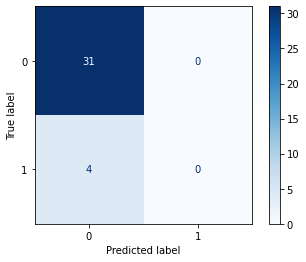

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       0.00      0.00      0.00         4

    accuracy                           0.89        35
   macro avg       0.44      0.50      0.47        35
weighted avg       0.78      0.89      0.83        35



c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p103m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))